In [ ]:
import pandas as pd


df = pd.read_csv(r'C:\V S Code\Sample - Superstore.csv', encoding='ISO-8859-1')


print(df.head())

print("\nData Types and Nulls:")
print(df.info())


print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns")


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [7]:
print("Missing Values in Each Column:")
print(df.isnull().sum())

# 2. Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

# 3. Convert 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# 4. Confirm column data types again
print("\nUpdated Data Types:")
print(df.dtypes)

Missing Values in Each Column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Number of duplicate rows:
0

Updated Data Types:
Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             ob

In [8]:
# Total sales, profit, and quantity
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_quantity = df['Quantity'].sum()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Quantity Sold: {total_quantity}")


Total Sales: $2,297,200.86
Total Profit: $286,397.02
Total Quantity Sold: 37873


In [9]:
region_sales_profit = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print("\nSales and Profit by Region:")
print(region_sales_profit)



Sales and Profit by Region:
               Sales       Profit
Region                           
West     725457.8245  108418.4489
East     678781.2400   91522.7800
Central  501239.8908   39706.3625
South    391721.9050   46749.4303


C:\Users\javeedlaptop\AppData\Local\Temp\ipykernel_21900\292901921.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('Category')['Sales'].sum().reset_index(), x='Category', y='Sales', palette='pastel')


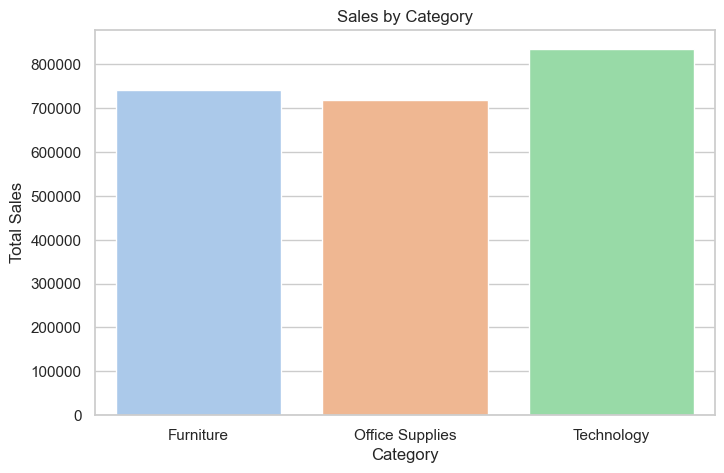

C:\Users\javeedlaptop\AppData\Local\Temp\ipykernel_21900\292901921.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False),


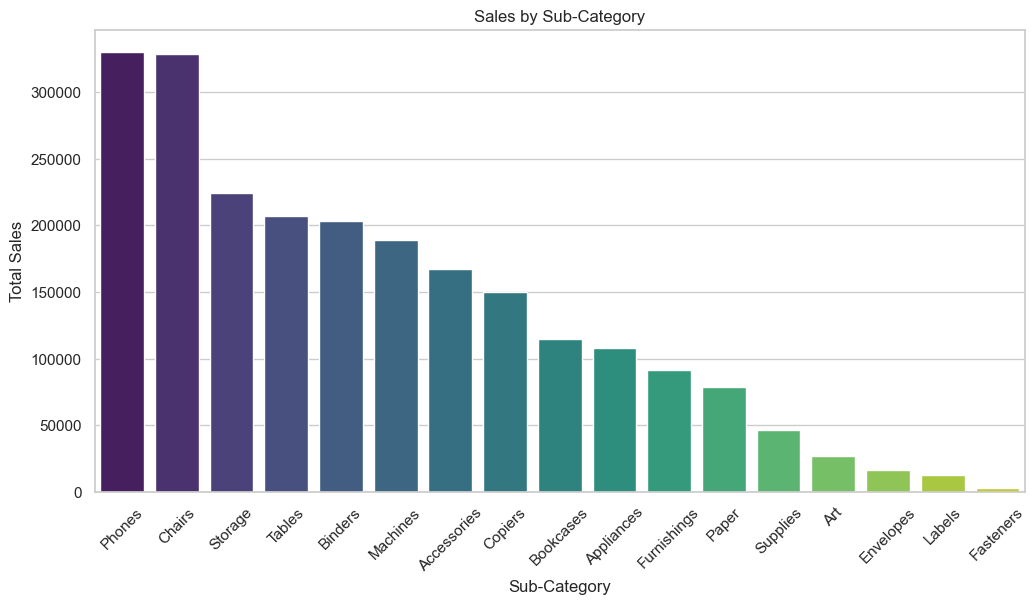

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Sales by Category
plt.figure(figsize=(8, 5))
sns.barplot(data=df.groupby('Category')['Sales'].sum().reset_index(), x='Category', y='Sales', palette='pastel')
plt.title("Sales by Category")
plt.ylabel("Total Sales")
plt.show()

# Sales by Sub-Category
plt.figure(figsize=(12, 6))
sns.barplot(data=df.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False),
            x='Sub-Category', y='Sales', palette='viridis')
plt.title("Sales by Sub-Category")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.show()


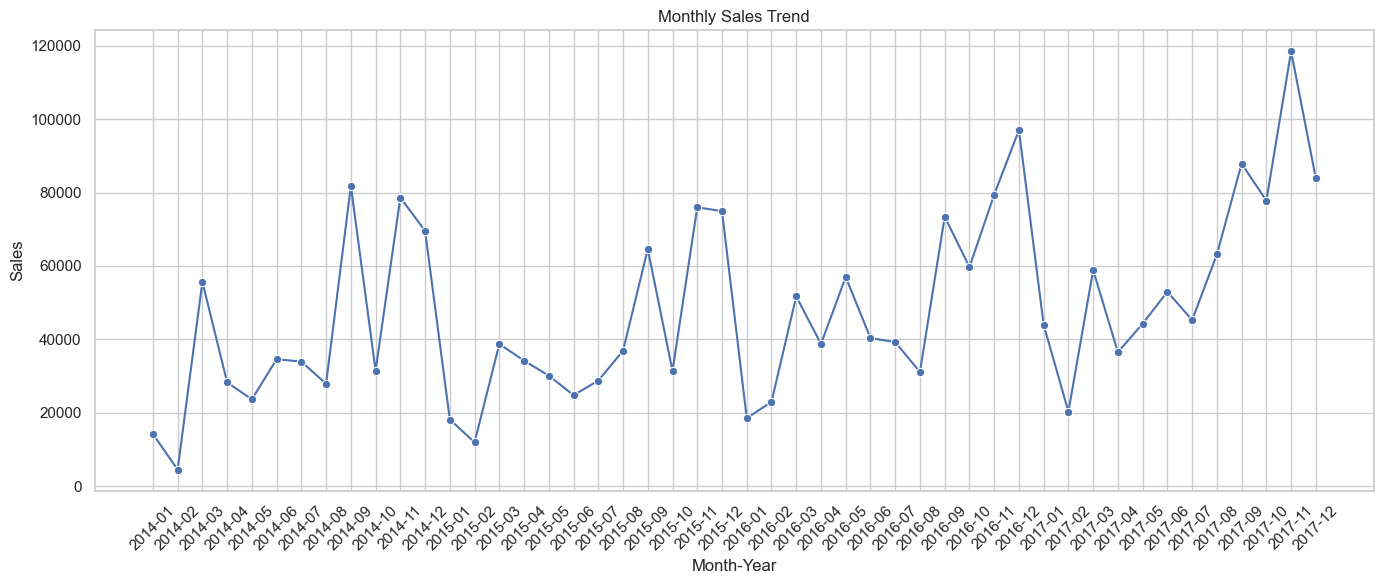

In [12]:
# Extract month-year for trend analysis
df['Month-Year'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month-Year')['Sales'].sum().reset_index()
monthly_sales['Month-Year'] = monthly_sales['Month-Year'].astype(str)

# Line chart
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Month-Year', y='Sales', marker='o')
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
